In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from scipy.stats import randint
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [10]:
# Study data files
Airline_path = "data/Fixed_flight.csv"

Airline = pd.read_csv(Airline_path, header=0,  index_col=0)

for column in Airline.columns:
    print(f"Column {column} has {Airline[column].isnull().sum()} null values")
    
Airline = Airline.dropna().reset_index()


Column MONTH has 0 null values
Column DAY has 0 null values
Column AIRLINE has 0 null values
Column ORIGIN_AIRPORT has 0 null values
Column DESTINATION_AIRPORT has 0 null values
Column DEPARTURE_DELAY has 8698 null values
Column DELAYED has 0 null values


In [11]:
Airline

,index,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DELAYED
0,2385615,6,1,NK,LAS,IAH,92.0,1
1,2385616,6,1,AA,SEA,DFW,8.0,1
2,2385617,6,1,DL,ANC,SLC,-4.0,0
3,2385618,6,1,US,SLC,CLT,-11.0,0
4,2385619,6,1,F9,LAS,IAD,2.0,1
...,...,...,...,...,...,...,...,...
495194,2889507,6,30,UA,LAX,ORD,-1.0,0
495195,2889508,6,30,UA,LAX,IAH,90.0,1
495196,2889509,6,30,UA,PDX,IAH,113.0,1
495197,2889510,6,30,UA,SEA,IAH,13.0,1


In [12]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495199 entries, 0 to 495198
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                495199 non-null  int64  
 1   MONTH                495199 non-null  int64  
 2   DAY                  495199 non-null  int64  
 3   AIRLINE              495199 non-null  object 
 4   ORIGIN_AIRPORT       495199 non-null  object 
 5   DESTINATION_AIRPORT  495199 non-null  object 
 6   DEPARTURE_DELAY      495199 non-null  float64
 7   DELAYED              495199 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 30.2+ MB


In [13]:
Airline.isna().sum()

index                  0
MONTH                  0
DAY                    0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
DELAYED                0
dtype: int64

In [14]:
Airline.describe()

,index,MONTH,DAY,DEPARTURE_DELAY,DELAYED
count,4.951990e+05,495199.0,495199.000000,495199.000000,495199.000000
mean,2.637488e+06,6.0,15.497885,13.986016,0.434938
std,1.458098e+05,0.0,8.659906,43.279332,0.495749
min,2.385615e+06,6.0,1.000000,-52.000000,0.000000
25%,2.510634e+06,6.0,8.000000,-4.000000,0.000000
50%,2.637271e+06,6.0,16.000000,-1.000000,0.000000
75%,2.764136e+06,6.0,23.000000,13.000000,1.000000
max,2.889511e+06,6.0,30.000000,1522.000000,1.000000


In [15]:
Airline.columns

Index(['index', 'MONTH', 'DAY', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'DELAYED'],
      dtype='object')

In [16]:
X_cat = Airline[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
X_num = Airline.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DELAYED'], axis=1)
X_num

,index,MONTH,DAY,DEPARTURE_DELAY
0,2385615,6,1,92.0
1,2385616,6,1,8.0
2,2385617,6,1,-4.0
3,2385618,6,1,-11.0
4,2385619,6,1,2.0
...,...,...,...,...
495194,2889507,6,30,-1.0
495195,2889508,6,30,90.0
495196,2889509,6,30,113.0
495197,2889510,6,30,13.0


In [17]:
X_cat

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,NK,LAS,IAH
1,AA,SEA,DFW
2,DL,ANC,SLC
3,US,SLC,CLT
4,F9,LAS,IAD
...,...,...,...
495194,UA,LAX,ORD
495195,UA,LAX,IAH
495196,UA,PDX,IAH
495197,UA,SEA,IAH


In [18]:
# Catagorize all the non number data (Flight locations, Airlines)
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495194,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
495195,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
495196,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
495197,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Scale just the number data of the X-axis and add it to the catagorized dataframe as is.
# Make it your new X-axis with the Y-axis being delayed or not
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = Airline['DELAYED']

In [20]:
X.head()

,index,MONTH,DAY,DEPARTURE_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,-1.727407,0.0,-1.67414,1.802571,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.727400,0.0,-1.67414,-0.138311,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.727394,0.0,-1.67414,-0.415580,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.727387,0.0,-1.67414,-0.577320,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.727380,0.0,-1.67414,-0.276946,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X.isna().sum()

index                      0
MONTH                      0
DAY                        0
DEPARTURE_DELAY            0
AIRLINE_AS                 0
                          ..
DESTINATION_AIRPORT_WRG    0
DESTINATION_AIRPORT_WYS    0
DESTINATION_AIRPORT_XNA    0
DESTINATION_AIRPORT_YAK    0
DESTINATION_AIRPORT_YUM    0
Length: 643, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Using AffinityPropgation to clean inf / nan values for logistic regression and following models to perform

import pandas as pd
from sklearn.cluster import AffinityPropagation


In [24]:
df = pd.DataFrame(Airline)

In [25]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

In [26]:
data = df.to_numpy()
print(data)

[[2385615 6 1 ... 'IAH' 92.0 1]
 [2385616 6 1 ... 'DFW' 8.0 1]
 [2385617 6 1 ... 'SLC' -4.0 0]
 ...
 [2889509 6 30 ... 'IAH' 113.0 1]
 [2889510 6 30 ... 'IAH' 13.0 1]
 [2889511 6 30 ... 'SJU' 8.0 1]]


In [ ]:
# af= AffinityPropagation(random_state=5).fit(data)
# print(af.cluster_centers_)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [29]:

classifier.fit(X_train, y_train)

C:\Users\Connor\anaconda3\envs\PythonData38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.999994614955883
Testing Data Score: 0.9999919224555736


In [31]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
randomForestClass = RandomForestClassifier(random_state=42)
randomForestClass.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
print("RandomForestClassifier score: ", randomForestClass.score(X_test,y_test))

RandomForestClassifier score:  1.0


In [35]:
# Create a RandomForestClassifier model, fit it to the data, and print the model's score.
randomForestClass_scaled = RandomForestClassifier(random_state=42)
randomForestClass_scaled.fit(X_train_scaled, y_train)
print("RandomForestClassifier scaled score: ", randomForestClass_scaled.score(X_test_scaled, y_test))

RandomForestClassifier scaled score:  1.0


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [37]:
# Size for images
mpl.rcParams['figure.figsize'] = (17,10)
mpl.rcParams['font.size'] = 20

<AxesSubplot:>

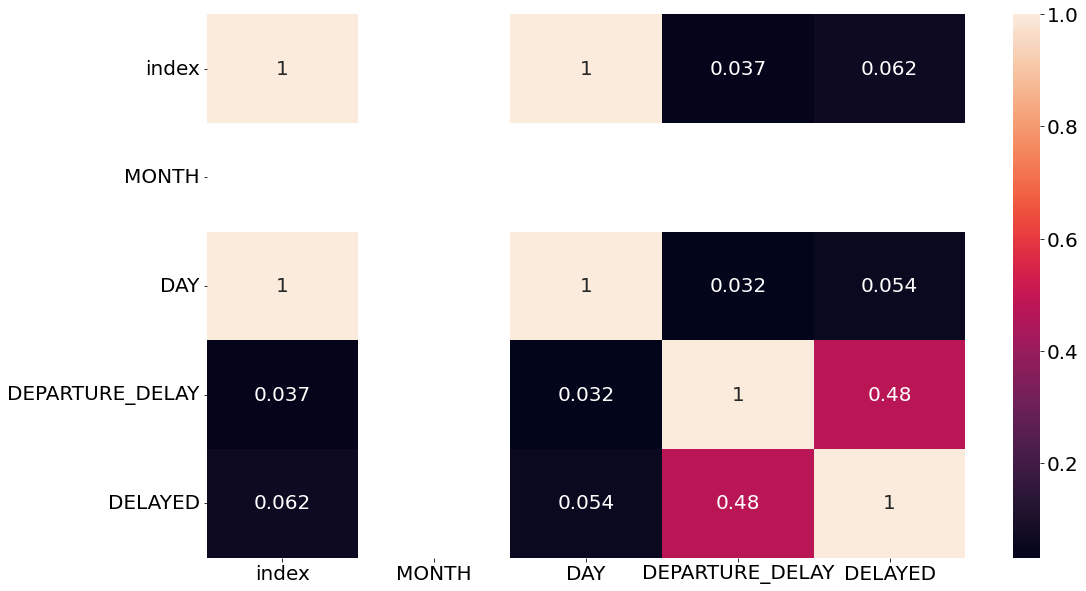

In [38]:
sns.heatmap(Airline.corr(), annot=True)

<AxesSubplot:xlabel='DAY', ylabel='count'>

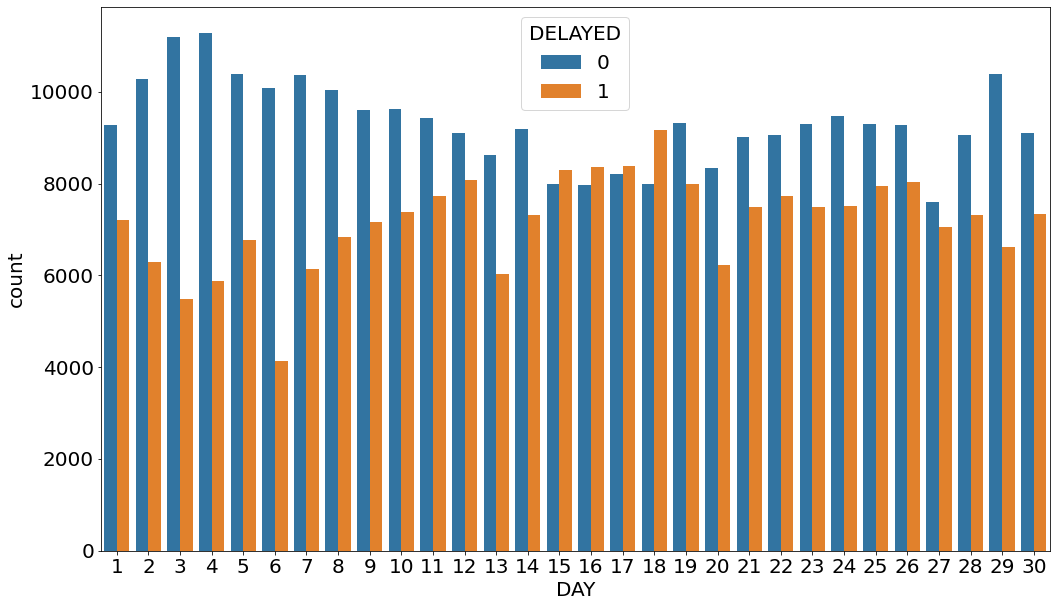

In [39]:
sns.countplot(data=Airline, x='DAY', hue='DELAYED')

<AxesSubplot:xlabel='AIRLINE', ylabel='Count'>

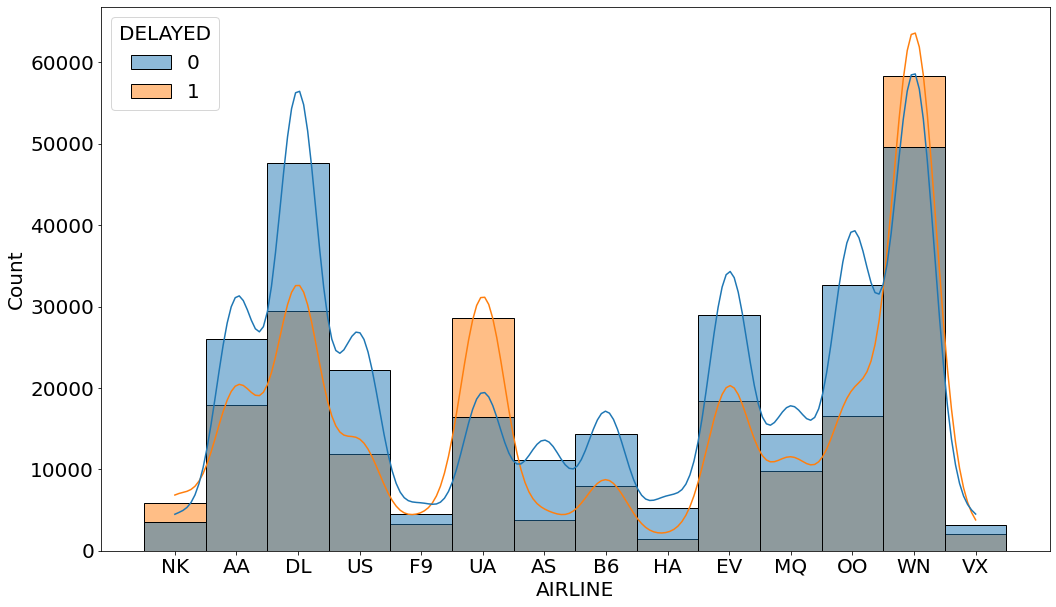

In [41]:
sns.histplot(data=Airline, x='AIRLINE', hue='DELAYED', kde=True)

<AxesSubplot:xlabel='DAY', ylabel='Count'>

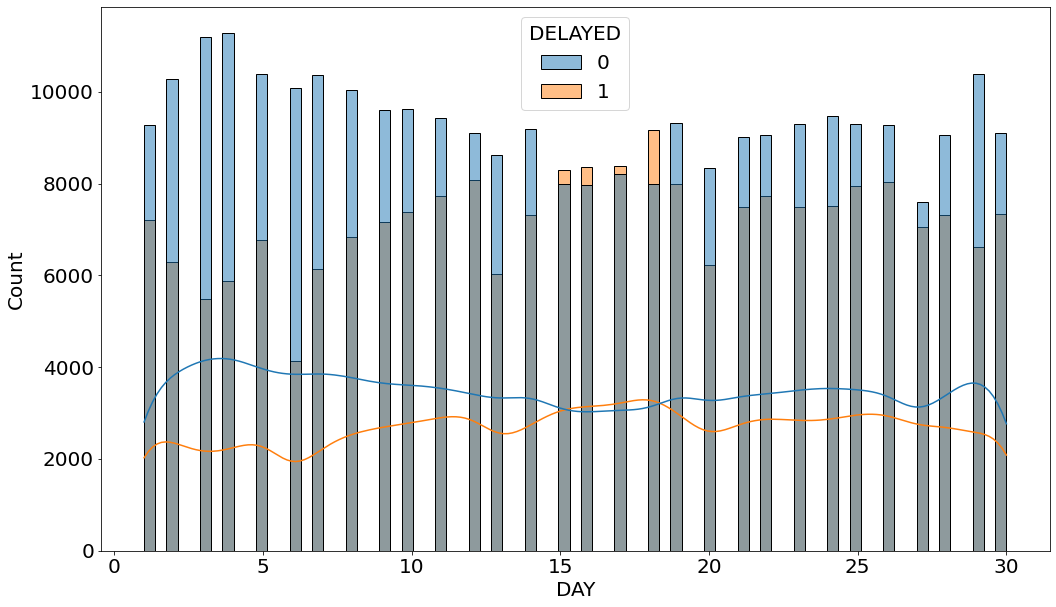

In [42]:
sns.histplot(data=Airline, x='DAY', hue='DELAYED', kde=True)

<AxesSubplot:xlabel='ORIGIN_AIRPORT', ylabel='count'>

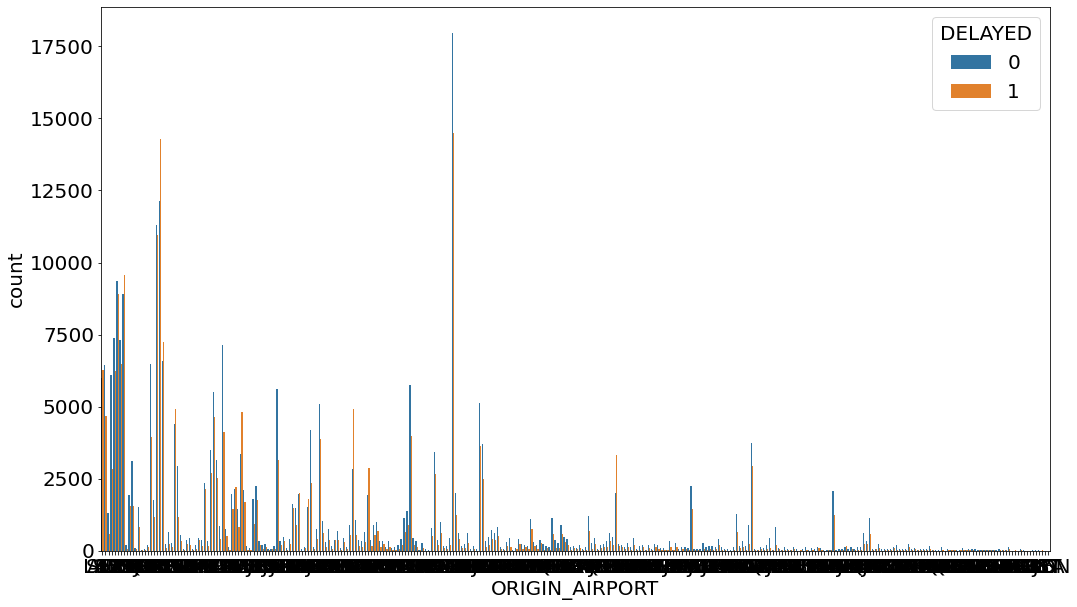

In [43]:
sns.countplot(data=Airline, x='ORIGIN_AIRPORT', hue='DELAYED')

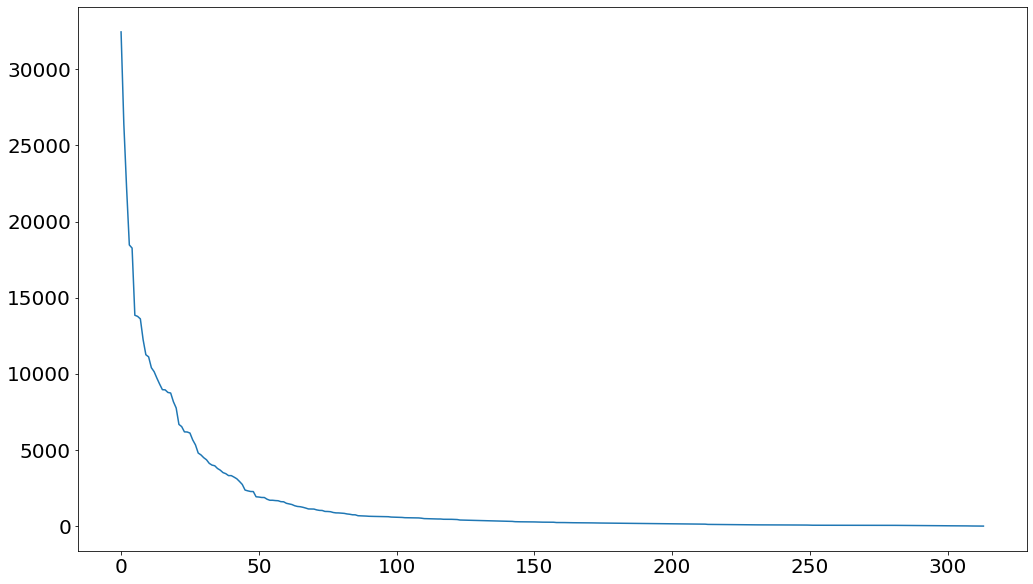

In [44]:
airfrom = Airline['ORIGIN_AIRPORT'].value_counts()
plt.plot(range(len(airfrom)), airfrom)

In [45]:
Airline['ORIGIN_AIRPORT'] = Airline['ORIGIN_AIRPORT'].apply(lambda s: s if str(s) in airfrom[:50] else 'others')

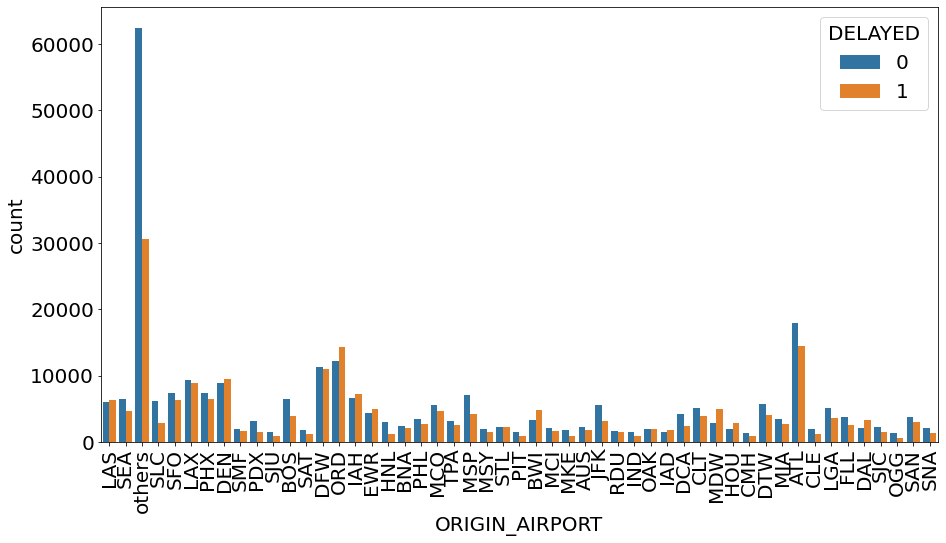

In [46]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=Airline, x='ORIGIN_AIRPORT', hue='DELAYED')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='DESTINATION_AIRPORT', ylabel='count'>

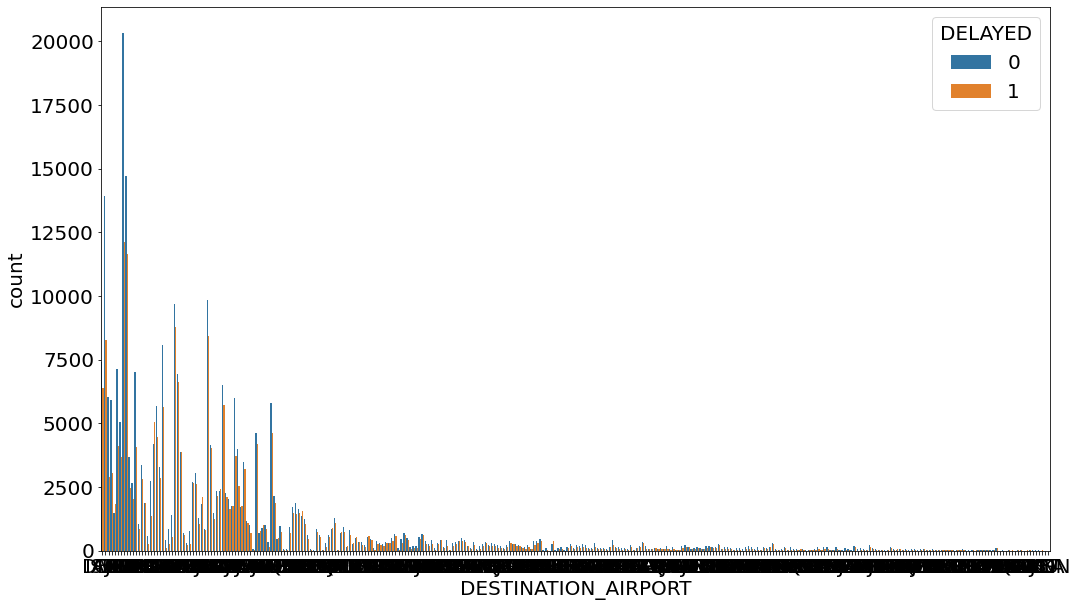

In [47]:
sns.countplot(data=Airline, x='DESTINATION_AIRPORT', hue='DELAYED')

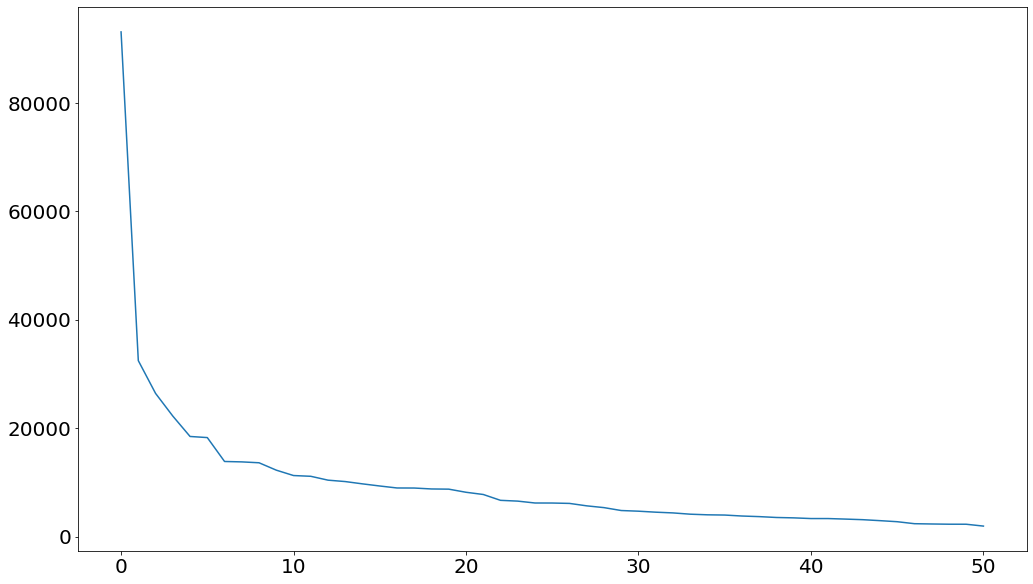

In [48]:
airto = Airline['ORIGIN_AIRPORT'].value_counts()
plt.plot(range(len(airto)), airto)

In [49]:
Airline['DESTINATION_AIRPORT'] = Airline['DESTINATION_AIRPORT'].apply(lambda s: s if str(s) in airto[:50] else 'others')

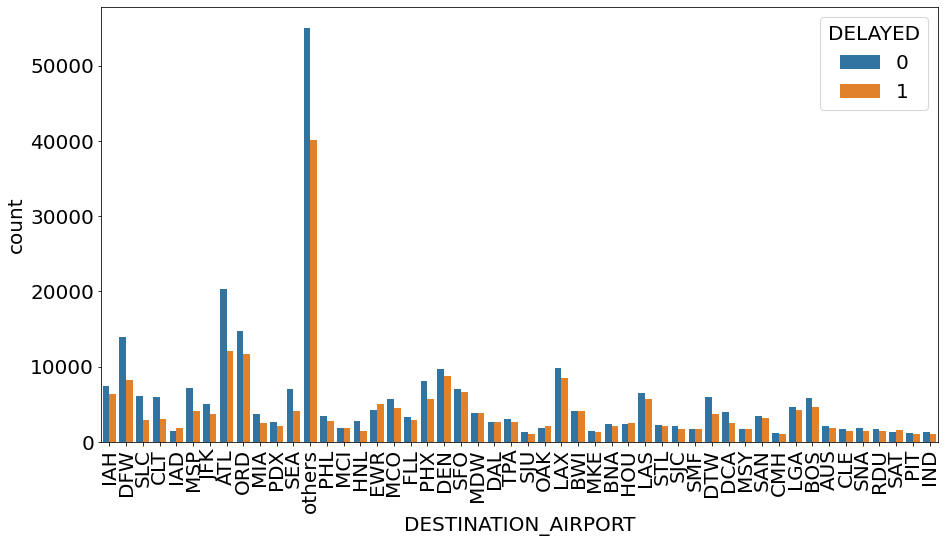

In [50]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=Airline, x='DESTINATION_AIRPORT', hue='DELAYED')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='DAY', ylabel='count'>

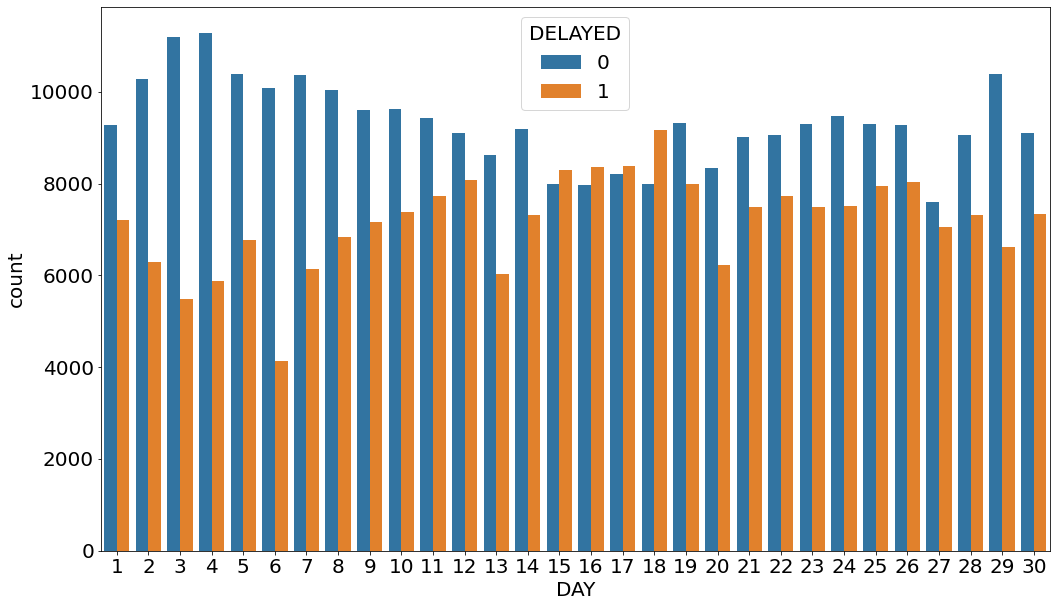

In [51]:
sns.countplot(data=Airline, x='DAY', hue='DELAYED')